In [1]:
%matplotlib inline

import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import random
import pymc3 as pm

# Chapter 4

## Easy

**4E1** In the model definition below, which line is the likelihood?

```
yi ∼ Normal(μ, σ)
μ ∼ Normal(0, 10)
σ ∼ Uniform(0, 10)
```

The first line is the likelihood

**4E2** In the model definition just above, how many parameters are in the posterior distribution?

It has two parameters to be estimated: μ and σ

**4E3** Using the model definition above, write down the appropriate form of Bayes’ theorem that
includes the proper likelihood and priors.

```
Pr(μ,σ|yi) = ∏i Normal(yi|μ,σ)Normal(μ|0,10)Uniform(σ|0,10) / ∫ ∫ ∏i Normal(yi|μ,σ)Normal(μ|0,10)Uniform(σ|0,10)dμdσ
```

**4E4** In the model de nition below, which line is the linear model? 

```
yi ∼ Normal(μ, σ)
μi = α + βxi
α ∼ Normal(0, 10) 
β ∼ Normal(0, 1)
σ ∼ Uniform(0, 10)
```

The second line

**4E5** In the model de nition just above, how many parameters are in the posterior distribution?

It has two parameters to be estimated: μ and σ

## Medium

**4M1** For the model de nition below, simulate observed heights from the prior (not the posterior)

```
yi ∼ Normal(μ, σ)
μ ∼ Normal(0, 10) 
σ ∼ Uniform(0, 10)
```

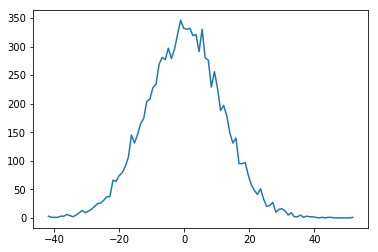

In [2]:
random.seed(100)
sample_mu = np.random.normal(loc=0, scale=10, size=10000)
sample_sigma = np.random.uniform(low=0, high=10, size=10000)
y = np.random.normal(loc=sample_mu, scale=sample_sigma)

y, bin_edges=np.histogram(y, bins=100)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
plt.plot(bin_centers, y)

**4M2** Translate the model just above into a map formula.

In [3]:
basic_model = pm.Model()

with basic_model:

    mu = pm.Normal('mu', mu=0, sd=10)
    sigma = pm.Uniform('sigma', lower=0, upper=10)

    # likelihood of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma)

**4M3** Translate the map model formula below into a mathematical model definition.

```
flist <- alist(
    y ~ dnorm( mu , sigma ),
    mu <- a + b*x,
    a ~ dnorm( 0 , 50 ),
    b ~ dunif( 0 , 10 ),
    sigma ~ dunif( 0 , 50 )
```

```
yi ∼ Normal(μ, σ)
μi = α + βxi
α ∼ Normal(0, 50)
β ∼ Unifrom(0, 10)
σ ∼ Uniform(0, 50)
```

**4M4** A sample of students is measured for height each year for 3 years. After the third year, you want to fit a linear regression predicting height using year as a predictor. Write down the mathematical model definition for this regression, using any variable names and priors you choose. Be perepared to defend your choice of priors.

```
yi ∼ Normal(μ, σ)
μi = α + βxi
α ∼ Normal(160, 50)
β ∼ Unifrom(0, 10)
σ ∼ Uniform(0, 10)
```

In this model, yi is the height and xi is the year (first year, second year, etc.). Alpha is the expected height when xi = 0, that is, at the first year. Since I do not know the students' ages, I can not really infer what the expected height for a typical student is during the first year, so I am going to use a very wide prior for alpha. Beta indicates the rate of change in height for every year that passes. Once again, not knowing the age of the students makes it hard to set a prior for this parameter. If the students are young, this rate will be higher. Therefore, and once again, I will use a wide prior (10 centimeters per year seems quite wide to me). Finally, the sigma prior will account for what would be a normal human height range.   

**4M5** Now suppose I tell you that the average height in the first year was 120cm and that every student got taller each year. Does this information lead you to change your choice of priors? How?

That makes change my expected value of alpha from 160 to 120. Additionally, it makes me decrese the standard deviation of the alpha prior distribution, because I have more information. Additionally, this information makes me think that the students are quite young and therefore that a expected increase in height between 0 and 10cm per year is not so unlikely, so I will not modify beta's prior distribution.

```
yi ∼ Normal(μ, σ)
μi = α + βxi
α ∼ Normal(120, 20)
β ∼ Unifrom(0, 10)
σ ∼ Uniform(0, 10)
```

**4M6** Now suppose I tell you that the variance among heights for students of the same age is never more than 64cm. How does this lead you to revise your priors?

This new piece of information makes me decrease the upper edge of the sigma prior distribution:

```
yi ∼ Normal(μ, σ)
μi = α + βxi
α ∼ Normal(120, 20)
β ∼ Unifrom(0, 10)
σ ∼ Uniform(0, 8)
```